# Rock Paper Scissors

1. 이미지 분류기 모델이 성공적으로 만들어졌는가?	
  학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음

2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?	
  오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음 

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?	
  60% 이상 도달하였음


In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [ ]:
from PIL import Image
import glob
import os

## 데이터 불러오기 및 처리

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/rock_scissor_paper/rock/rock'
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/rock_scissor_paper/paper'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


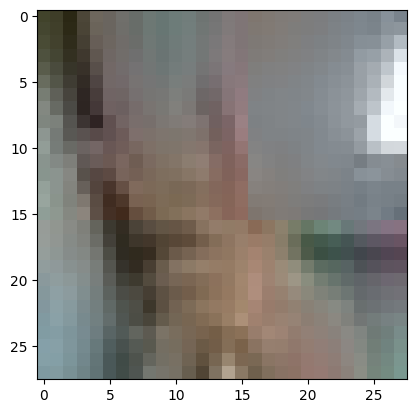

In [ ]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils
import matplotlib.pyplot as plt
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (

## 모델 학습

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train_norm,
                    y_train,
                    epochs=40,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
5/5 [==============================] - 1s 37ms/step - loss: 2.1589 - accuracy: 0.2800
Epoch 2/40
5/5 [==============================] - 0s 32ms/step - loss: 1.5141 - accuracy: 0.3333
Epoch 3/40
5/5 [==============================] - 0s 33ms/step - loss: 1.1280 - accuracy: 0.4233
Epoch 4/40
5/5 [==============================] - 0s 33ms/step - loss: 0.9749 - accuracy: 0.5833
Epoch 5/40
5/5 [==============================] - 0s 34ms/step - loss: 0.9238 - accuracy: 0.5833
Epoch 6/40
5/5 [==============================] - 0s 32ms/step - loss: 0.8093 - accuracy: 0.6400
Epoch 7/40
5/5 [==============================] - 0s 34ms/step - loss: 0.7062 - accuracy: 0.7200
Epoch 8/40
5/5 [==============================] - 0s 35ms/step - loss: 0.6371 - accuracy: 0.6800
Epoch 9/40
5/5 [==============================] - 0s 34ms/step - loss: 0.6494 - accuracy: 0.6667
Epoch 10/40
5/5 [==============================] - 0s 34ms/step - loss: 0.5871 - accuracy: 0.6767
Epoch 11/40
5/5 [============

In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/rock_scissor_paper/test_data'
resize_images(image_dir_path)

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터(x)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/AIFFEL/Data/rock_scissor_paper/test_data"
(x_test, y_test)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

0  images to be resized.
0  images resized.
데이터(x)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [ ]:
# model을 평가하는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.